In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [65]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

In [66]:
train_dataset = datasets.ImageFolder('./train_medium_augmented/', transform=transform)
val_dataset = datasets.ImageFolder('./val_augmented/', transform=transform)

In [67]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

classes = ('footway', 'primary')

[tensor([[[[-1.0000,  0.3412, -0.5216,  ..., -0.7412, -0.9686, -0.9765],
          [-0.8902, -0.7569, -0.4196,  ..., -0.6314, -0.5765, -1.0000],
          [-1.0000, -0.4431, -0.3569,  ..., -0.9294, -0.8667, -0.8431],
          ...,
          [-0.4980, -1.0000, -0.5529,  ..., -0.7020,  0.0667, -0.3647],
          [-0.9765, -1.0000, -0.7961,  ..., -0.8118, -0.9373, -1.0000],
          [-0.2549, -0.9529, -0.9843,  ..., -0.9294, -0.1451, -0.9451]],

         [[-0.9529,  0.3882, -0.4980,  ..., -0.7412, -0.9686, -0.9765],
          [-0.8431, -0.7098, -0.3961,  ..., -0.6314, -0.5765, -1.0000],
          [-0.9765, -0.3961, -0.3333,  ..., -0.9294, -0.8667, -0.8431],
          ...,
          [-0.4980, -1.0000, -0.5529,  ..., -0.7020,  0.0667, -0.3647],
          [-0.9765, -1.0000, -0.7961,  ..., -0.8118, -0.9373, -1.0000],
          [-0.2549, -0.9529, -0.9843,  ..., -0.9294, -0.1451, -0.9451]],

         [[-1.0000,  0.3098, -0.5686,  ..., -0.7569, -0.9843, -0.9922],
          [-0.9216, -0.7882, 

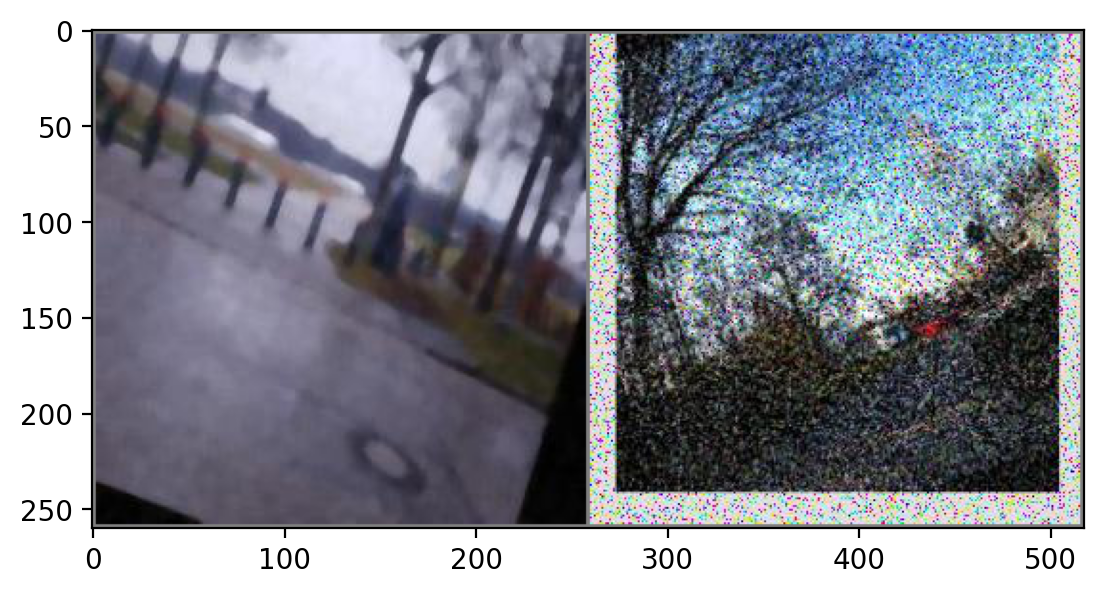

footway


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
print(next(dataiter))
print(len(next(dataiter)))
images, labels = next(dataiter)
print(labels)

# show images
imshow(torchvision.utils.make_grid(images[0:2]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

In [69]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 3 input image channel, 6 output channels, 5x5 square convolution

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 61 * 61, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [70]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [86]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=59536, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [85]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()        
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.440
[1,   400] loss: 0.464
[1,   600] loss: 0.442
[1,   800] loss: 0.454


KeyboardInterrupt: 

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [76]:
PATH = './test_0.pth'
torch.save(net.state_dict(), PATH)

a torch.Size([3, 260, 1034])


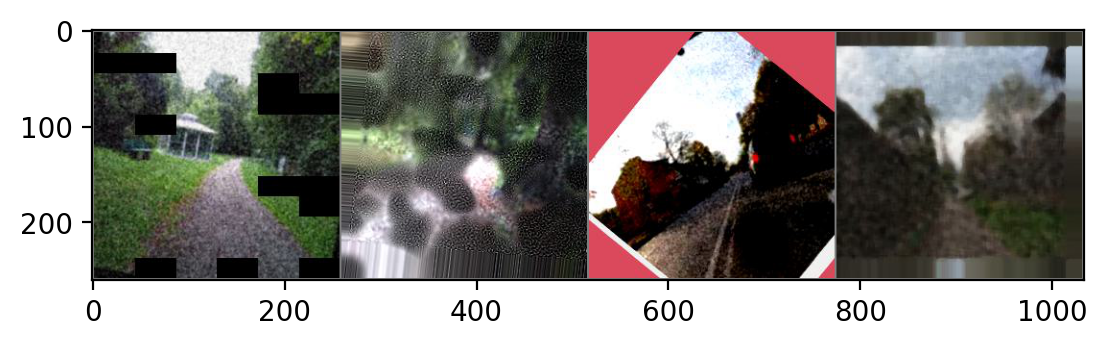

GroundTruth:  footway footway primary footway


In [77]:
dataiter = iter(val_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [78]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [79]:
outputs = net(images)

In [80]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  footway primary primary primary
